In [1]:
import csv
from collections import defaultdict

In [2]:
def process_runlog(filename):
    data = defaultdict(list)
    with open(filename) as f:
        reader = csv.reader(f)
        for line in reader:
            run = line[1].strip().split(',')
            initial, steps, pressed = int(run[1]), int(run[2]), int(run[3])

            result = line[2].strip()
            if result == 'fault':
                result = -np.inf
            else:
                result = float(result)

            data[initial].append(result)

    data = dict(data)

    # Sort results
    for val_l in data.values():
        val_l.sort()

    return data

In [3]:
filename = 'runlog.csv'

In [4]:
data = process_runlog(filename)

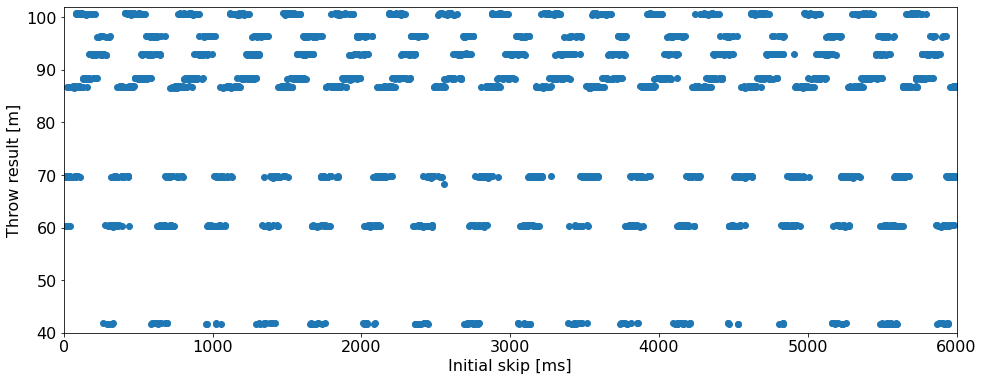

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('figure', facecolor='w')
plt.rc('font', size=16)

plt.figure(figsize=(16, 6))

plt.xlabel('Initial skip [ms]')
plt.ylabel('Throw result [m]')

plt.xlim(0, 6000)
plt.ylim(40, 102)

x, y = [], []
for initial, values in data.items():
    for val in values:
        x.append(initial)
        y.append(val)
plt.scatter(x, y)

plt.show()

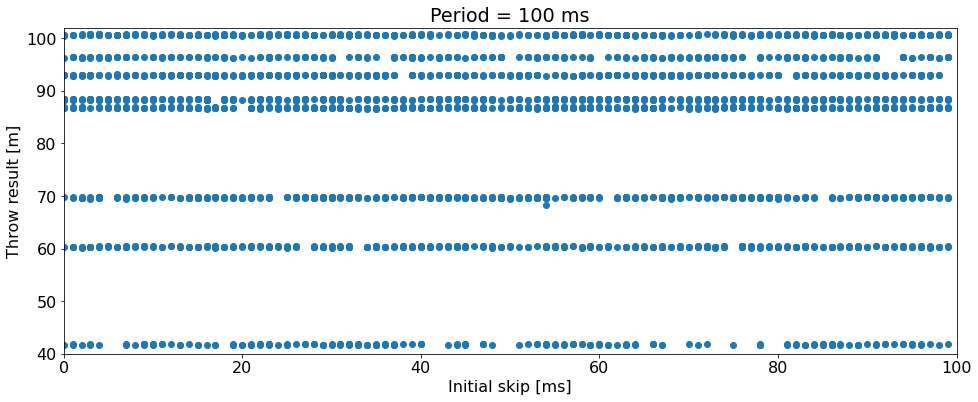

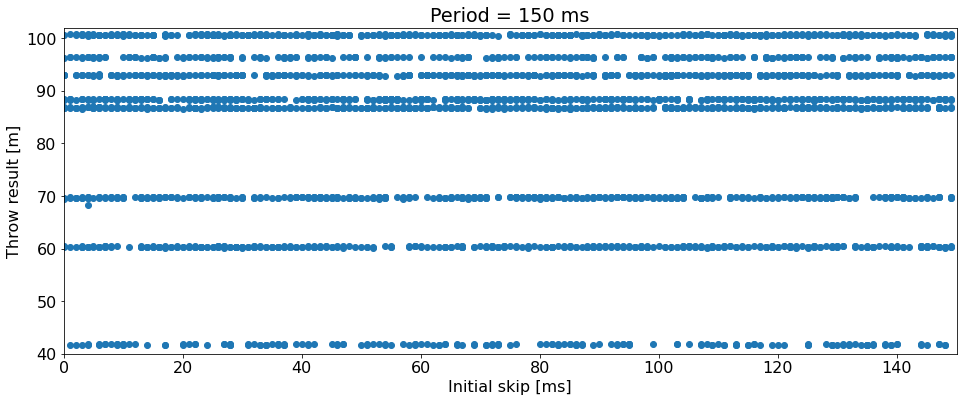

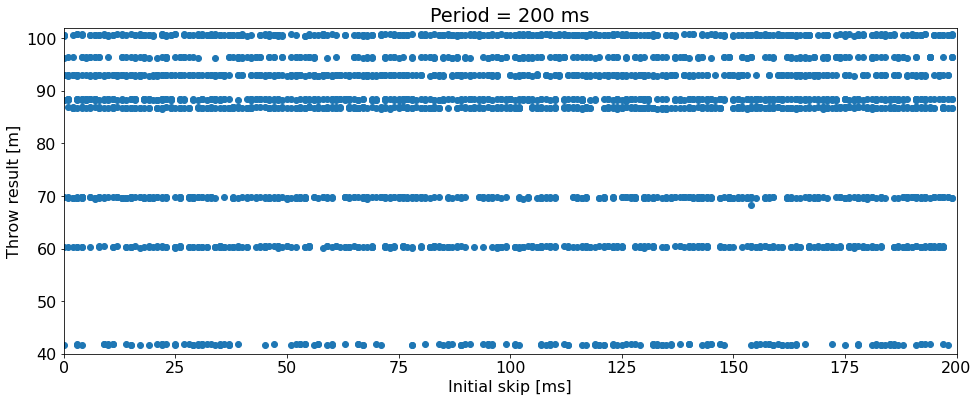

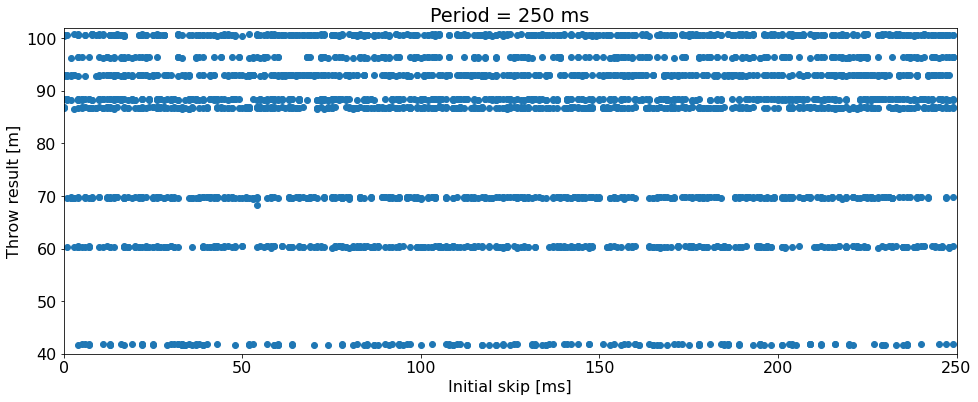

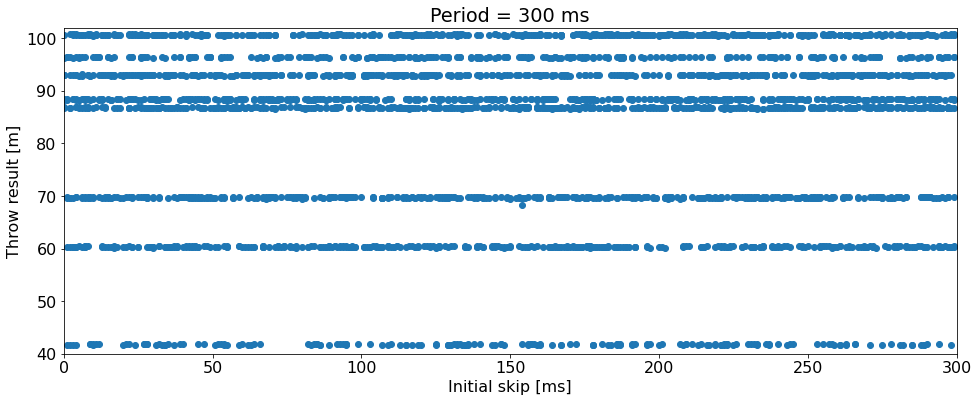

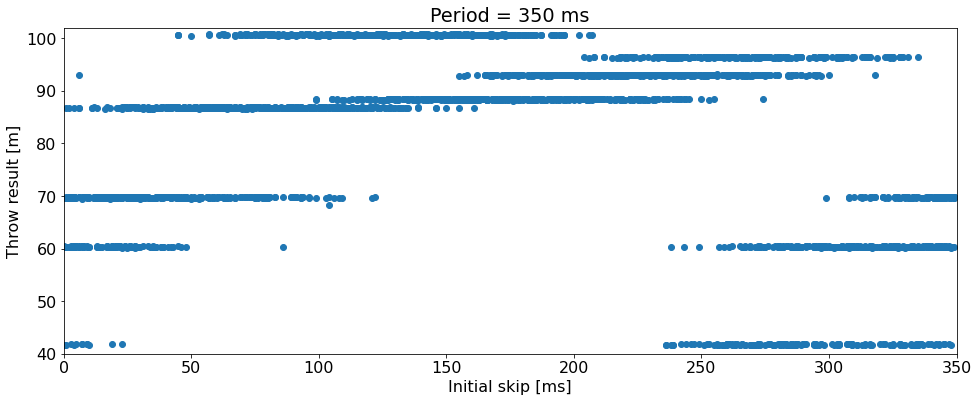

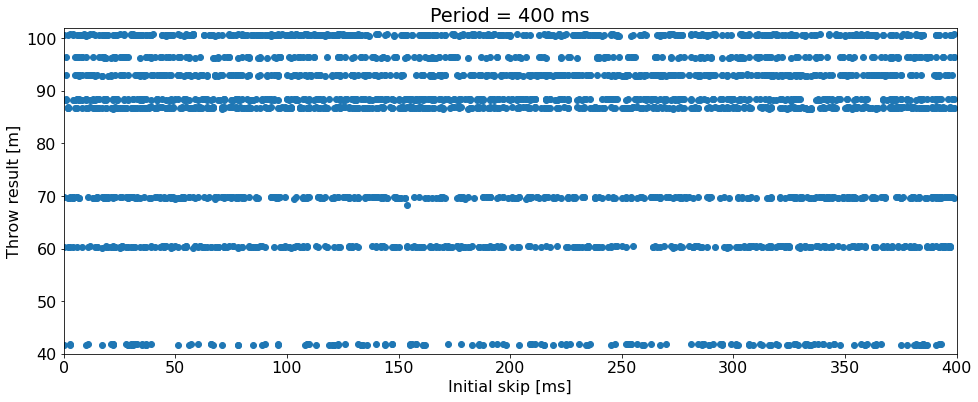

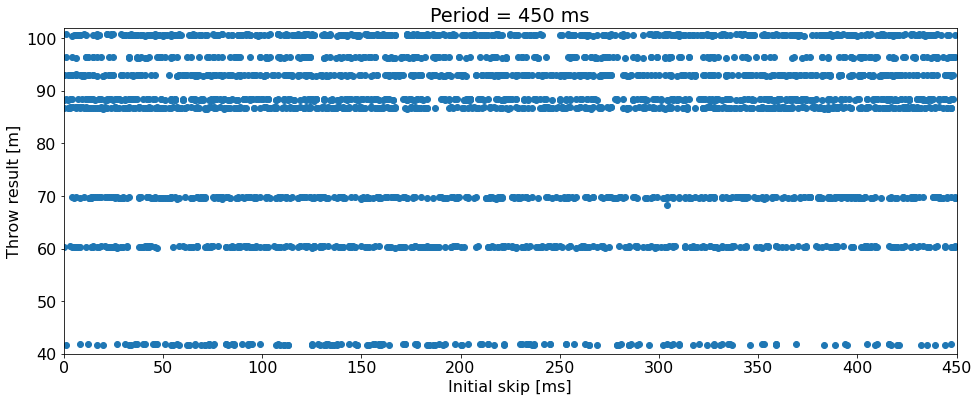

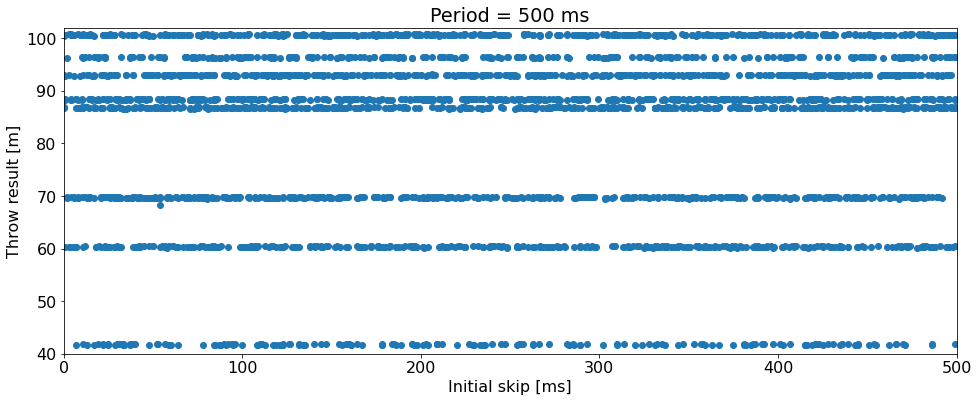

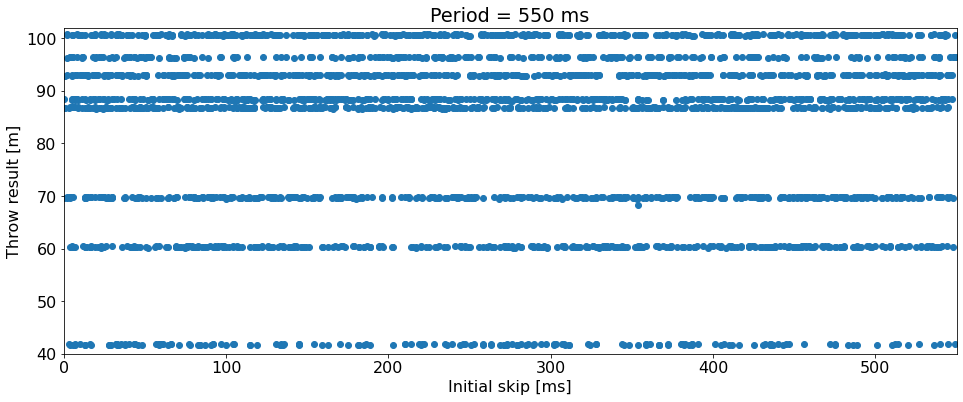

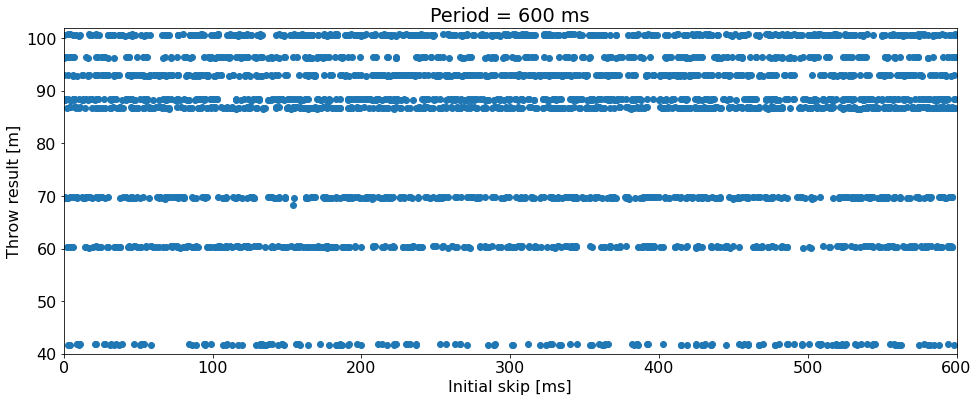

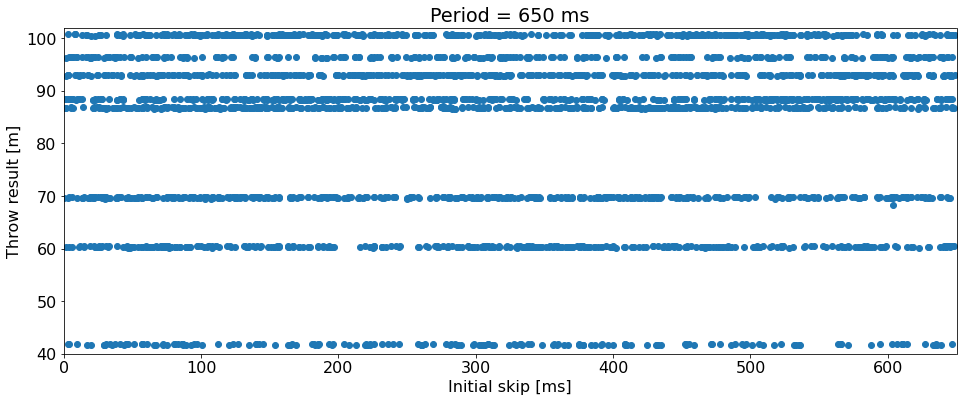

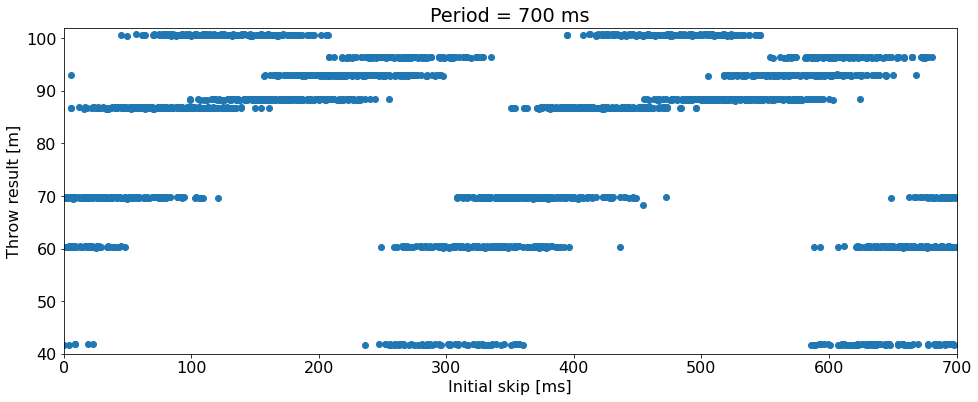

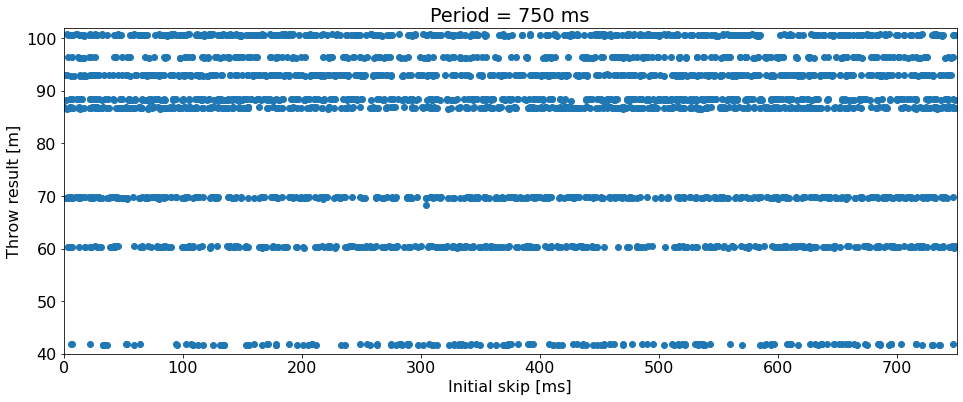

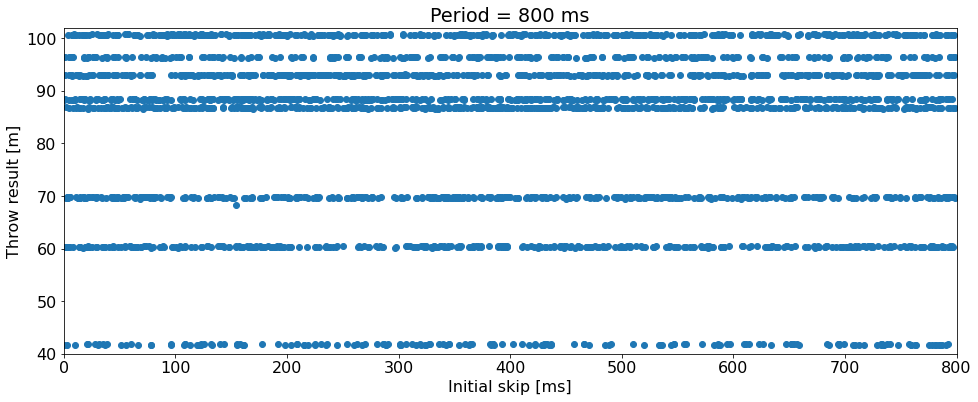

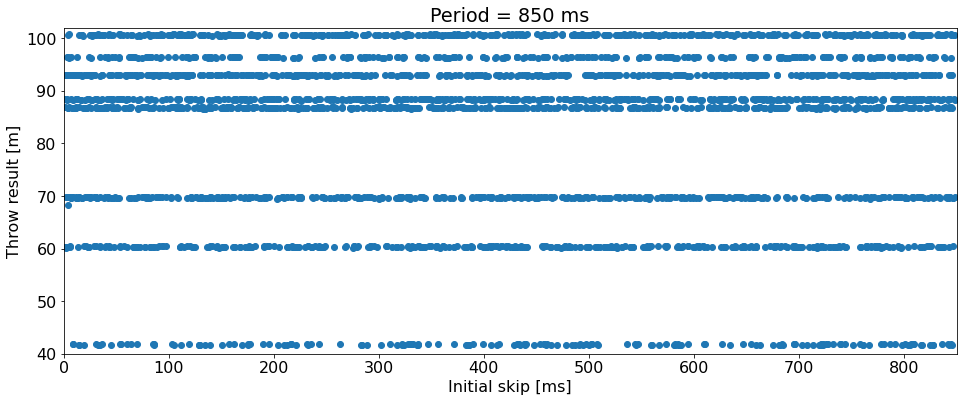

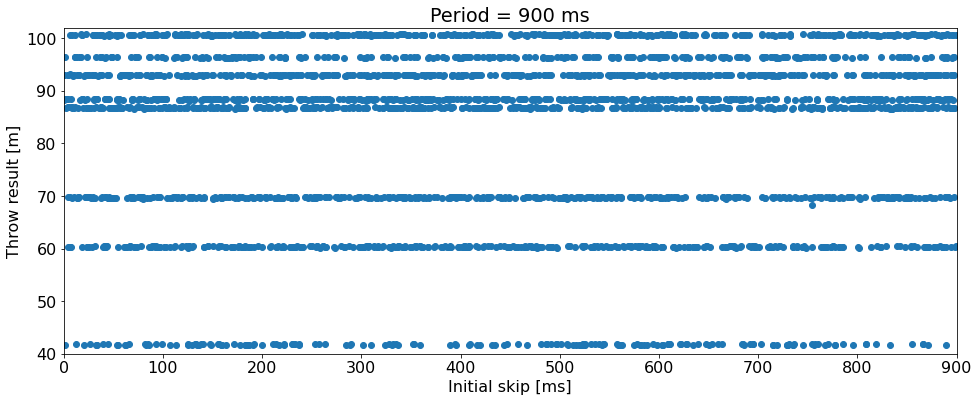

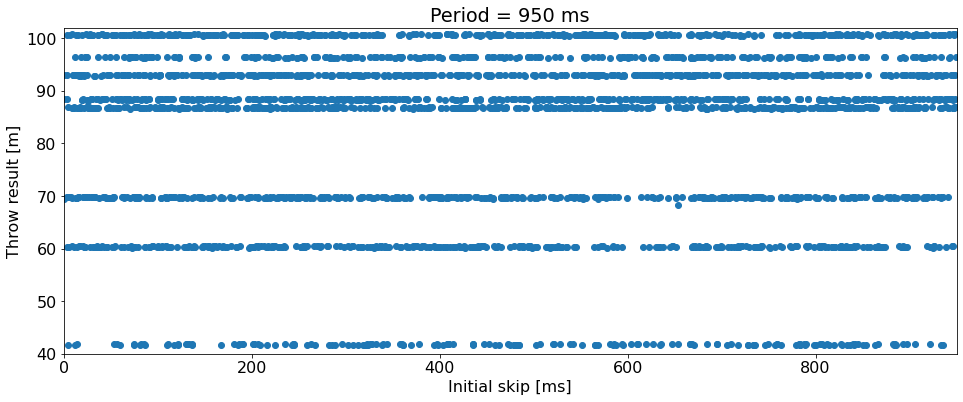

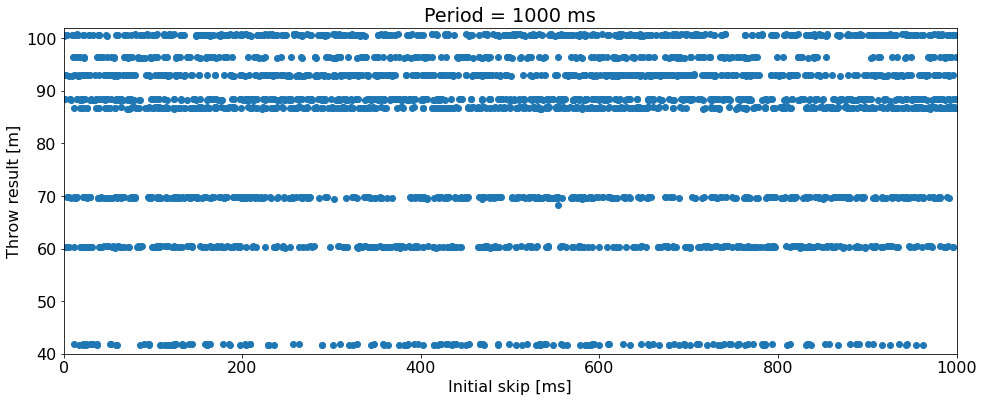

In [6]:
for mod in range(100, 1001, 50):
    plt.figure(figsize=(16, 6))

    plt.title(f'Period = {mod} ms')
    plt.xlabel('Initial skip [ms]')
    plt.ylabel('Throw result [m]')

    plt.xlim(0, mod)
    plt.ylim(40, 102)

    x, y = [], []
    for initial, values in data.items():
        for val in values:
            x.append(initial % mod)
            y.append(val)
    plt.scatter(x, y)

    plt.show()